# Simple Cosmic Rays Experiment (Part I)

<font size="3">In this notebook the Waiting Time Distribution is plotted for the internal triggers (BC) and the external triggers (AD) for a Cosmic Ray Experiment with a dead time $T_{dead}=220$ ms. At the end, we fit the distribution to a exponential function in order to obtain an estimation for the $\tau$ and $N$ parameters. </font>

## Setting the environment

In [7]:
#version: 20-APR-2023
#Color printing
from termcolor import colored

from ROOT import *
import numpy as np
import pandas as pd
import math

#Variables

DST_TIME =[]

N_bins_Dt = 100;
X_MIN_Dt =    0.0;
X_MAX_Dt = 1000.0; # [ms]

## Reading data 

Pandas DataFrame object has many usefull methods to read the data from various sources

In [8]:
fileName = 'P1_DST_int_trg_BC.p1t'

#read the whole file. Use only column with index==2
dst_time = np.loadtxt(fname=fileName, usecols=2)
print(colored("Data shape:","blue"),dst_time.shape)

Data shape: (17500,)


## Data preprocessing

Calculate $\Delta t = \Delta t_{i+1} - \Delta t_{i}$ or equivalently $\Delta t = \Delta t_{i} - \Delta t_{i-1}$.</font>

* create a "rolled" array
* calculate difference between original and rolled arrays - this gives $\Delta t = \Delta t_{i+1} - \Delta t_{i}$ 
* skip the last element of the difference, as this gives difference between last and first elements

In [9]:
rolled = np.roll(dst_time, shift=-1)

#calculate difference between rows
dst_delta = rolled - dst_time

#remove the last element
dst_delta = dst_delta[:-1]

print("Original data array:\n", dst_time)
print("Rolled data array:\n", rolled)
print("Difference: \n",dst_delta)

Original data array:
 [   9592.    9886.   10121. ... 5664285. 5664552. 5664894.]
Rolled data array:
 [   9886.   10121.   10607. ... 5664552. 5664894.    9592.]
Difference: 
 [294. 235. 486. ... 501. 267. 342.]


## Fill the histogram for $\Delta t$

In [10]:
#Define the histogram
his_Data_dt = TH1F("h_DATA_Dt",'Data;#Delta t (ms); #events',N_bins_Dt,X_MIN_Dt,X_MAX_Dt)

#Fill the histogram
for aItem in dst_delta:
    his_Data_dt.Fill(aItem)

Warning in <TROOT::Append>: Replacing existing TH1: h_DATA_Dt (Potential memory leak).


## Fitting the histogram

<font size="3"> Taking the Probability Density Function as <font size="4"> $p(t) = \frac{1}{\tau} e^{-t/\tau}$ </font> then we could calculate the number of events $N_{events}$ in $t > T_{dead}$ by integrating as below :</font>

 <font size="4"> $N_{events} = \int_{t > T_{dead}} N \cdot p(t) \cdot dt$ </font>

<font size="3"> but considering a discrete case we should use the next expression:</font>

 <font size="4"> $N_{events}= \sum_{n=0}^{N_{bins}} N \cdot W \cdot p(t_n)$ </font>

<font size="3"> where $N$ is taken as a proportional constant and $W$ is the width of the histogram bins. </font>

<font size="3"> Now, we could obtain an aproximation of  <font size="4"> $f(t) = N \cdot W \cdot \frac{1}{\tau} e^{-t/\tau}$ </font> by fitting this exponential function to our data distribution this will allow to obtaing values for the $N$ and $\tau$ parameters. </font>

In [11]:
### Fitting Delta t histogram

#Our histogram have equidistant bins, bin number "1" below is "any bin"
bin_w = his_Data_dt.GetXaxis().GetBinWidth(1)

#Setting the exponential function for P(x)
function_exp =str(bin_w)+"*([0]/[1])*exp(-x/[1])"       
f_func_exp    =  TF1("Exp", function_exp , 220.0, X_MAX_Dt)

#Initializing the parameters
tau   =   100.
N_evt = 20000.

f_func_exp.SetParName(0,"N")
f_func_exp.SetParameter(0,N_evt)

f_func_exp.SetParName(1,"tau")
f_func_exp.SetParameter(1,tau)

#Fitting histogram with a exponential function
his_Data_dt.Fit("Exp","OL","",220.0,X_MAX_Dt)

#Obtaining parameters from the fitting
N_err = f_func_exp.GetParError(0)
tau_err = f_func_exp.GetParError(1)

N     = f_func_exp.GetParameter(0)
tau   = f_func_exp.GetParameter(1)

 FCN=41.5355 FROM MIGRAD    STATUS=CONVERGED      95 CALLS          96 TOTAL
                     EDM=4.37899e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.45663e+05   2.61088e+03   4.76009e+00   4.54245e-08
   2  tau          1.03847e+02   7.97882e-01   1.50713e-03   1.89060e-04
                               ERR DEF= 0.5


## Plotting 

<font size="3"> We plot the exponential function $f(t)$ with our data from $T_{dead}= 220$ ms to $T=1000$ ms. </font>

Value of    N: 145663.364978
Value of    tau: 103.846747
Minimum value of fitting is:  220
Maximum value of fitting is:  1000.0
Value of    NFD: 76.000000
Value of    Chi2: 84.329369


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName2


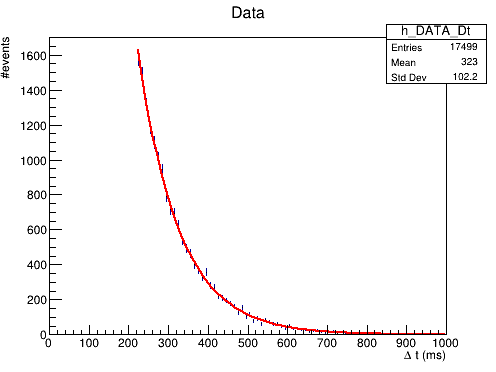

In [12]:
#Plotting histogram along the exponential function
c2 = TCanvas("myCanvasName2","The Canvas Title",500,400)

f_func_exp.SetLineColor(kRed)
f_func_exp.SetLineWidth(1)
f_func_exp.SetLineStyle(1)
f_func_exp.Draw("same")

# Draw Fit and Histogram
his_Data_dt.Draw("ex0")
c2.Draw()

print ('Value of    N: {0:2f}'.format(N))
print ('Value of    tau: {0:2f}'.format(tau))
print("Minimum value of fitting is: ", 220)
print("Maximum value of fitting is: ", X_MAX_Dt) 
print ('Value of    NFD: {0:2f}'.format(f_func_exp.GetNDF()))
print ('Value of    Chi2: {0:2f}'.format(f_func_exp.GetChisquare())) 